In [159]:
import os
import wfdb
import pickle
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from tqdm import tqdm_notebook
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import load_model
import seaborn as sns
np.set_printoptions(suppress=True)
%matplotlib inline

## Read result dataframe ( use Maxpooling )

In [160]:
def drop_repeat(df,axis="RMSE",repeat=5):
    if "accuracy" in axis:
        func = max
    else:
        func = min
    num = int(len(df)/repeat)
    result_df = []
    for i in range(num):
        part_df = df[i*repeat:(i+1)*repeat]
        max_row = part_df[part_df[axis]==func(part_df[axis])]
        index = np.array(max_row["idx"])[0]
        result_df.append(max_row[max_row.idx==index])
    tmp = pd.concat(result_df,axis=0)
    return tmp

In [161]:
#result_df_max = drop_repeat(pd.read_csv("./results_max/result.csv"),axis="accuracy",repeat=10)
result_df_max = pd.read_csv("./results_max/result.csv")
result_df_max = result_df_max.drop(['Unnamed: 0'],axis=1)
#result_df_avg = drop_repeat(pd.read_csv("./results_avg/result.csv"),axis="accuracy",repeat=10)
result_df_avg = pd.read_csv("./results_avg/result.csv")
result_df_avg = result_df_avg.drop(['Unnamed: 0'],axis=1)
result_df = pd.concat([result_df_max,result_df_avg],axis=0)

In [162]:
result_df

,idx,cross_idx,repeat_idx,loss,accuracy,consistency,consistency_af,consistency_normal,pooling_type
0,1,0,0,0.270494,0.917808,0.840680,0.841251,0.837530,MaxPooling
1,2,0,1,0.315981,0.938356,0.842844,0.830763,0.909375,MaxPooling
2,3,0,2,0.302306,0.924658,0.795159,0.765481,0.958600,MaxPooling
3,4,0,3,0.116997,0.965753,0.924658,0.914619,0.979940,MaxPooling
4,5,0,4,0.329616,0.952055,0.943067,0.952828,0.889316,MaxPooling
...,...,...,...,...,...,...,...,...,...
45,46,4,5,0.171820,0.960000,0.864420,0.839107,1.000000,AveragePooling
46,47,4,6,0.534027,0.566667,0.381618,0.266165,1.000000,AveragePooling
47,48,4,7,0.224378,0.893333,0.774142,0.731974,1.000000,AveragePooling
48,49,4,8,0.210914,0.933333,0.951911,0.942933,1.000000,AveragePooling


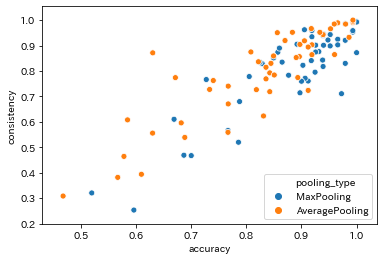

In [163]:
sns.scatterplot(data=result_df,x="accuracy",y="consistency",hue="pooling_type")

(0.5, 1.0)

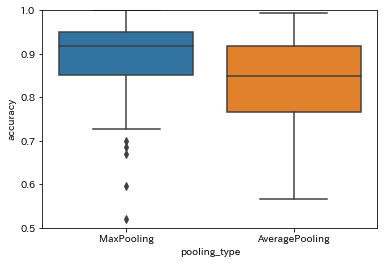

In [164]:
sns.boxplot(data=result_df,x="pooling_type",y="accuracy")
plt.ylim(0.5,1.0)

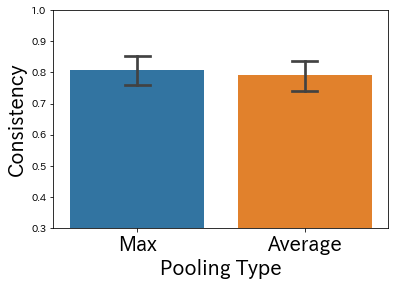

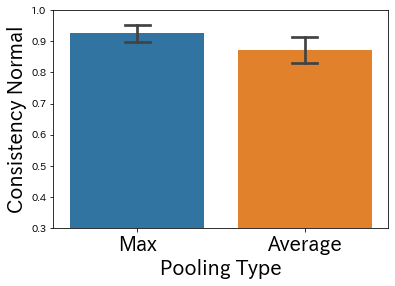

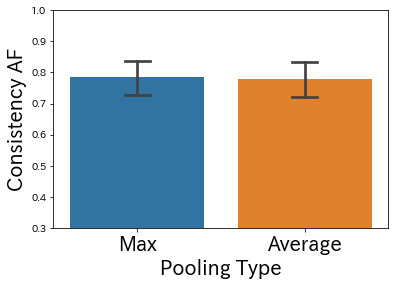

In [180]:
#plt.figure(figsize=(12,4))
sns.barplot(data=result_df,x="pooling_type",y="consistency",capsize=0.15)
plt.ylabel("Consistency",fontsize=20)
plt.xlabel("Pooling Type",fontsize=20)
plt.xticks(range(2),["Max","Average"],fontsize=20)
plt.ylim(0.3,1.0)
plt.show()

#plt.subplot(132)
sns.barplot(data=result_df,x="pooling_type",y="consistency_normal",capsize=0.15)
plt.ylabel("Consistency Normal",fontsize=20)
plt.xlabel("Pooling Type",fontsize=20)
plt.xticks(range(2),["Max","Average"],fontsize=20)
plt.ylim(0.3,1.0)
plt.show()


#plt.subplot(133)
sns.barplot(data=result_df,x="pooling_type",y="consistency_af",capsize=0.15)
plt.ylabel("Consistency AF",fontsize=20)
plt.xlabel("Pooling Type",fontsize=20)
plt.xticks(range(2),["Max","Average"],fontsize=20)
plt.ylim(0.3,1.0)
plt.show()


In [187]:
avg_point = [0,0]
max_point = [0,0]

avg_point_n = [0,0]
max_point_n = [0,0]

avg_point_a = [0,0]
max_point_a = [0,0]

avg_point[0] = np.mean(result_df[result_df.pooling_type=="AveragePooling"].accuracy)
avg_point[1] = np.mean(result_df[result_df.pooling_type=="AveragePooling"].consistency)
avg_point_n[0] = np.mean(result_df[result_df.pooling_type=="AveragePooling"].accuracy)
avg_point_n[1] = np.mean(result_df[result_df.pooling_type=="AveragePooling"].consistency_normal)
avg_point_a[0] = np.mean(result_df[result_df.pooling_type=="AveragePooling"].accuracy)
avg_point_a[1] = np.mean(result_df[result_df.pooling_type=="AveragePooling"].consistency_af)


max_point[0] = np.mean(result_df[result_df.pooling_type=="MaxPooling"].accuracy)
max_point[1] = np.mean(result_df[result_df.pooling_type=="MaxPooling"].consistency)
max_point_n[0] = np.mean(result_df[result_df.pooling_type=="MaxPooling"].accuracy)
max_point_n[1] = np.mean(result_df[result_df.pooling_type=="MaxPooling"].consistency_normal)
max_point_a[0] = np.mean(result_df[result_df.pooling_type=="MaxPooling"].accuracy)
max_point_a[1] = np.mean(result_df[result_df.pooling_type=="MaxPooling"].consistency_af)

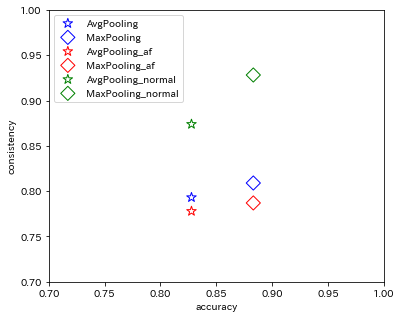

In [189]:
plt.figure(figsize=(6,5))
plt.scatter(x=avg_point[0],y=avg_point[1],marker="*",c='',edgecolors='b',s=100,label="AvgPooling")
plt.scatter(x=max_point[0],y=max_point[1],marker="D",c='',edgecolors='b',s=100,label="MaxPooling")

plt.scatter(x=avg_point_a[0],y=avg_point_a[1],marker="*",c='',edgecolors='r',s=100,label="AvgPooling_af")
plt.scatter(x=max_point_a[0],y=max_point_a[1],marker="D",c='',edgecolors='r',s=100,label="MaxPooling_af")

plt.scatter(x=avg_point_n[0],y=avg_point_n[1],marker="*",c='',edgecolors='g',s=100,label="AvgPooling_normal")
plt.scatter(x=max_point_n[0],y=max_point_n[1],marker="D",c='',edgecolors='g',s=100,label="MaxPooling_normal")

plt.xlabel("accuracy")
plt.ylabel("consistency")
plt.xlim(0.7,1.0)
plt.ylim(0.7,1.0)
plt.legend()

In [148]:
def Get_BlurFilter(filt_size):
    if(filt_size==1):
        return np.array([1.,])
    elif(filt_size==2):
        return np.array([1., 1.])
    elif(filt_size==3):
        return np.array([1., 2., 1.])
    elif(filt_size==4):    
        return np.array([1., 3., 3., 1.])
    elif(filt_size==5):    
        return np.array([1., 4., 6., 4., 1.])
    elif(filt_size==6):    
        return np.array([1., 5., 10., 10., 5., 1.])
    elif(filt_size==7):    
        return np.array([1., 6., 15., 20., 15., 6., 1.])

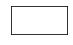

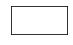

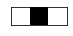

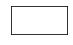

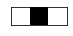

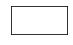

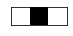

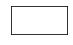

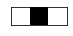

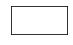

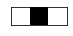

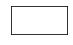

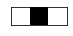

In [186]:
blur_size = 5
for blur_size in [i+2 for i in range(6)]:
    plt.figure(figsize=(1,5))
    _filter = np.expand_dims(Get_BlurFilter(blur_size),axis=0)
    plt.imshow(_filter,cmap="Greys")
    plt.xticks([])
    plt.yticks([])
    plt.show(())